# Load the CSV File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast  # For safely evaluating strings of lists
import seaborn as sns
%matplotlib inline

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('../data_2nd-experiment.csv', sep=';', quotechar='"')


/home/noname/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [19]:
df.head()

,model,coordinates,zoomedEntities,url,limit,assistantInstructions,extraInstructions,prompt,response,durationCB,durationOAI,duration,waiting,logTime
0,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,44.6,"[2897.7999999970198, 3144.7000000029802, 3381....","[4587.5, 4834.4000000059605, 5071.300000011921]",6,2024-10-30T12:41:20.887Z
1,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,55.3,"[3773, 4038.0999999940395]","[4858.5999999940395, 5123.699999988079]",3,2024-10-30T12:41:32.331Z
2,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,80.7,"[1851.5999999940395, 2102.5]","[2740.3999999910593, 2991.2999999970198]",4,2024-10-30T12:41:37.121Z
3,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,48.8,[1944],[2831.9000000059605],4,2024-10-30T12:41:41.726Z
4,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,71.7,[2059],[2907.2000000029802],4,2024-10-30T12:41:46.476Z


In [24]:
df[['prompt', 'limit', 'durationCB']]

,prompt,limit,durationCB
0,What can I visit today in Madrid?,10,44.6
1,What can I visit today in Madrid?,10,55.3
2,What can I visit today in Madrid?,10,80.7
3,What can I visit today in Madrid?,10,48.8
4,What can I visit today in Madrid?,10,71.7
...,...,...,...
205,Do you know if I can visit the Eiffel Tower in...,650,120.8
206,Do you know if I can visit the Eiffel Tower in...,650,81.1
207,Do you know if I can visit the Eiffel Tower in...,650,123.9
208,Do you know if I can visit the Eiffel Tower in...,650,71.5


In [26]:
df[['prompt', 'limit', 'durationCB']].to_csv("output_format_temp.csv", sep=',')


In [3]:
df_raw_pois = pd.read_csv('../../data/csv/generated_GPT4o_Madrid_v3.csv', sep=',', quotechar='"')

### Transform the price to a number and percentage of occupancy. 

If price is a range, get the average

In [4]:
# Define a function to transform price values
def transform_price(price):
    if '€' in price:
        price = price.replace('€', '')  # Remove the '€' symbol
    if '-' in price:  # If it's a range like '20-40', calculate the average
        low, high = price.split('-')
        return int((float(low) + float(high)) / 2)
    elif price.replace(',', '').isdigit():  # Handle values like '3,60'
        return int(float(price.replace(',', '.')))
    else:  # For non-numeric values like 'varios precios'
        return -1  
    
    
df_raw_pois['price_avg'] = df_raw_pois['price'].apply(transform_price)
df_raw_pois['percentage_occupancy'] = df_raw_pois['occupancy']/df_raw_pois['capacity']*100.0

### Extract the entities IDs of the 10, 100 and 650 limits
And also create a dataframe out of it

In [5]:
list_entities_query_10  = ast.literal_eval(df[df['limit'] ==10]['zoomedEntities'].reset_index().iloc[0]['zoomedEntities'])
list_entities_query_100 = ast.literal_eval(df[df['limit']==100]['zoomedEntities'].reset_index().iloc[0]['zoomedEntities'])
list_entities_query_650 = ast.literal_eval(df[df['limit']==650]['zoomedEntities'].reset_index().iloc[0]['zoomedEntities'])
list_entities_query_10

['urn:ngsi-ld:PoI:170',
 'urn:ngsi-ld:PoI:213',
 'urn:ngsi-ld:PoI:23',
 'urn:ngsi-ld:PoI:230',
 'urn:ngsi-ld:PoI:240',
 'urn:ngsi-ld:PoI:246',
 'urn:ngsi-ld:PoI:258',
 'urn:ngsi-ld:PoI:287',
 'urn:ngsi-ld:PoI:381',
 'urn:ngsi-ld:PoI:422']

In [6]:
df_entities_limit_10 = df_raw_pois[df_raw_pois["id"].isin(list_entities_query_10)]
df_entities_limit_100= df_raw_pois[df_raw_pois["id"].isin(list_entities_query_100)]
df_entities_limit_650= df_raw_pois[df_raw_pois["id"].isin(list_entities_query_650)]

In [7]:
df_entities_limit_650['price'].unique()

array(['0€', '15€', '3€', '8€', '20-40€', '7€', '30-55€', '6€', '5€',
       '25-50€', '25-55€', '25€', '25-45€', '3,60€', '2€', '30-50€',
       '18€', '10€', '13€', '4€', '20-45€', '20-50€', '12€',
       'varios precios'], dtype=object)

<Axes: >

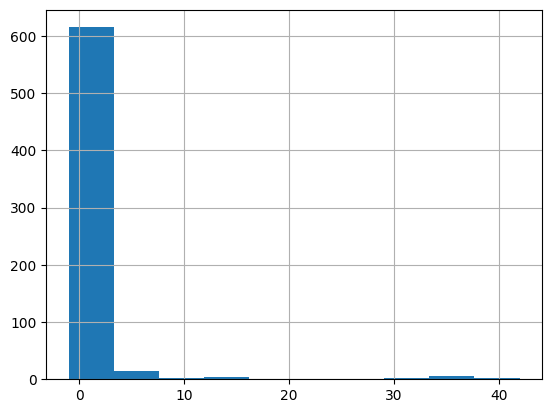

In [8]:
df_entities_limit_650['price_avg'].hist()

### PoIs with a price range between 10€ and 20€

In [9]:
df_entities_limit_100[(df_entities_limit_100['price_avg'] <= 20) & (df_entities_limit_100['price_avg'] >= 10)]

,id,type,title,relevance,image,location_type,coordinates,price,description,capacity,occupancy,price_avg,percentage_occupancy
5,urn:ngsi-ld:PoI:5,PoI,Museo del Prado,1,mdprado.jpeg,Point,"-3.692127,40.41378",15€,El Museo del Prado es el museo más importante ...,1171,870,15,74.295474
458,urn:ngsi-ld:PoI:458,PoI,Museo Reina Sofía,1,museo_reina_sofia.jpg,Point,"-3.694159,40.408665",10€,El Museo Reina Sofía es el principal museo de ...,1171,187,10,15.969257
500,urn:ngsi-ld:PoI:500,PoI,Museo Thyssen-Bornemisza,1,Museo_Thyssen-Bornemisza.jpeg,Point,"-3.69425,40.416873",13€,El Museo Thyssen-Bornemisza alberga una de las...,1171,517,13,44.150299
812,urn:ngsi-ld:PoI:812,PoI,Palacio Real de Madrid,1,palacioreal.jpeg,Point,"-3.714312,40.41798",12€,"El Palacio Real de Madrid, también conocido co...",1693,1449,12,85.587714


<Axes: >

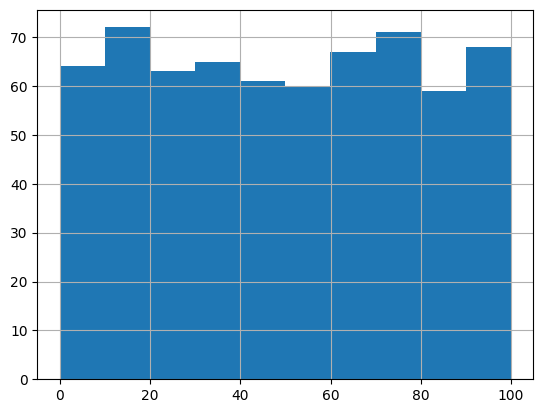

In [10]:
df_entities_limit_650['percentage_occupancy'].hist()

### PoIs with an occupancy ratio between 0 and 10%

In [11]:
filtered = df_entities_limit_650[(df_entities_limit_650['percentage_occupancy'] <= 10) & \
                      (df_entities_limit_650['percentage_occupancy'] >= 0)]
print(len(filtered))
filtered

64


,id,type,title,relevance,image,location_type,coordinates,price,description,capacity,occupancy,price_avg,percentage_occupancy
40,urn:ngsi-ld:PoI:40,PoI,Iglesia de San José,4,NaN,Point,"-3.703965,40.419337",0€,"Iglesia en el barrio de Lavapiés, conocida por...",444,14,0,3.153153e+00
52,urn:ngsi-ld:PoI:52,PoI,Hotel Eurostars Madrid Tower,2,NaN,Point,"-3.708204,40.464858",0€,"Hotel de lujo en la Torre Espacio, con vistas ...",1166,31,0,2.658662e+00
92,urn:ngsi-ld:PoI:92,PoI,Puerta del Sol,1,sol.jpg,Point,"-3.703834,40.416947",0€,La Puerta del Sol es una de las plazas más fam...,99999999999999999,29708,0,2.970800e-11
102,urn:ngsi-ld:PoI:102,PoI,Calle de Hortaleza,4,NaN,Point,"-3.702712,40.424123",0€,Vía vibrante y comercial en el centro de Madri...,656,10,0,1.524390e+00
107,urn:ngsi-ld:PoI:107,PoI,Avenida de la Albufera,4,NaN,Point,"-3.665580,40.399643",0€,Importante avenida que cruza varios distritos ...,99999999999999999,29708,0,2.970800e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,urn:ngsi-ld:PoI:1049,PoI,Colegio San José de Cluny,3,NaN,Point,"-3.709847,40.418305",0€,"Colegio en el barrio de Malasaña, con una ofer...",578,14,0,2.422145e+00
1052,urn:ngsi-ld:PoI:1052,PoI,Galería Nacional,3,NaN,Point,"-3.703234,40.418865",0€,Espacio expositivo dedicado a la pintura y esc...,1036,91,0,8.783784e+00
1069,urn:ngsi-ld:PoI:1069,PoI,Dulzainero,4,NaN,Point,"-3.705494,40.411550",0€,Pequeño pero famoso establecimiento en el barr...,66,2,0,3.030303e+00
1071,urn:ngsi-ld:PoI:1071,PoI,Farmacia de la Finca,3,NaN,Point,"-3.709821,40.423345",0€,Farmacia situada en el área de la Finca de Mad...,70,3,0,4.285714e+00


# Explore and first processing of the data

In [12]:
# Display the first few rows
df.head(100)


,model,coordinates,zoomedEntities,url,limit,assistantInstructions,extraInstructions,prompt,response,durationCB,durationOAI,duration,waiting,logTime
0,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,44.6,"[2897.7999999970198, 3144.7000000029802, 3381....","[4587.5, 4834.4000000059605, 5071.300000011921]",6,2024-10-30T12:41:20.887Z
1,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,55.3,"[3773, 4038.0999999940395]","[4858.5999999940395, 5123.699999988079]",3,2024-10-30T12:41:32.331Z
2,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,80.7,"[1851.5999999940395, 2102.5]","[2740.3999999910593, 2991.2999999970198]",4,2024-10-30T12:41:37.121Z
3,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,48.8,[1944],[2831.9000000059605],4,2024-10-30T12:41:41.726Z
4,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,71.7,[2059],[2907.2000000029802],4,2024-10-30T12:41:46.476Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,100,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid that is free ...,I do not know.,36.6,"[1539.0999999940395, 1653.5999999940395]","[5189.5, 5304]",2,2024-10-30T12:56:47.052Z
96,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,100,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid that is free ...,I do not know.,48.4,[1712.5],[3341],3,2024-10-30T12:56:51.899Z
97,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,100,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid that is free ...,I do not know.,65.3,"[1312.3999999910593, 1412.199999988079]","[3101.5, 3201.2999999970198]",0,2024-10-30T12:56:56.288Z
98,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,100,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid that is free ...,I do not know.,45

In [12]:
for index, row in df.iterrows():
    str = row['zoomedEntities']
    if "urn:ngsi-ld:PoI:005" in str:
        print(f"urn:ngsi-ld:PoI:005 exists in {index}")


## Convert some data types.

Example durationOAI, duration, limit

In [13]:
# Function to safely evaluate strings of lists
def parse_list_column(column):
    return column.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])


# Parse the columns
df['durationOAI_list'] = parse_list_column(df['durationOAI'])
df['duration_list'] = parse_list_column(df['duration'])

# For simplicity, let's extract the mean duration from the lists
df['durationOAI_mean'] = df['durationOAI_list'].apply(lambda x: sum(x) / len(x)
                                                      if x else None)
df['duration_mean'] = df['duration_list'].apply(lambda x: sum(x) / len(x)
                                                if x else None)

# For simplicity, let's extract the max and min
df['durationOAI_max'] = df['durationOAI_list'].apply(lambda x: max(x)
                                                     if x else None)
df['duration_max'] = df['duration_list'].apply(lambda x: max(x) if x else None)
df['durationOAI_min'] = df['durationOAI_list'].apply(lambda x: min(x)
                                                     if x else None)
df['duration_min'] = df['duration_list'].apply(lambda x: min(x) if x else None)

In [14]:
df['logTime'] = pd.to_datetime(df['logTime'])

In [15]:
df['limit'] = pd.to_numeric(df['limit'])

In [16]:
df.columns

Index(['model', 'coordinates', 'zoomedEntities', 'url', 'limit',
       'assistantInstructions', 'extraInstructions', 'prompt', 'response',
       'durationCB', 'durationOAI', 'duration', 'waiting', 'logTime',
       'durationOAI_list', 'duration_list', 'durationOAI_mean',
       'duration_mean', 'durationOAI_max', 'duration_max', 'durationOAI_min',
       'duration_min'],
      dtype='object')

In [17]:
df.head()

,model,coordinates,zoomedEntities,url,limit,assistantInstructions,extraInstructions,prompt,response,durationCB,...,waiting,logTime,durationOAI_list,duration_list,durationOAI_mean,duration_mean,durationOAI_max,duration_max,durationOAI_min,duration_min
0,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,44.6,...,6,2024-10-30 12:41:20.887000+00:00,"[2897.7999999970198, 3144.7000000029802, 3381....","[4587.5, 4834.4000000059605, 5071.300000011921]",3141.366667,4831.066667,3381.6,5071.3,2897.8,4587.5
1,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,55.3,...,3,2024-10-30 12:41:32.331000+00:00,"[3773, 4038.0999999940395]","[4858.5999999940395, 5123.699999988079]",3905.550000,4991.150000,4038.1,5123.7,3773.0,4858.6
2,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,80.7,...,4,2024-10-30 12:41:37.121000+00:00,"[1851.5999999940395, 2102.5]","[2740.3999999910593, 2991.2999999970198]",1977.050000,2865.850000,2102.5,2991.3,1851.6,2740.4
3,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,48.8,...,4,2024-10-30 12:41:41.726000+00:00,[1944],[2831.9000000059605],1944.000000,2831.900000,1944.0,2831.9,1944.0,2831.9
4,gpt-4o,"[-3.7641906738281254, 40.34811406840931, -3.64...","['urn:ngsi-ld:PoI:170', 'urn:ngsi-ld:PoI:213',...",http://localhost:1027/http://fiware-orion-ld:1...,10,You are a tourist guide in the city from where...,You should provide the information in plain te...,What can I visit today in Madrid?,Here are some places you can visit in Madrid:....,71.7,...,4,2024-10-30 12:41:46.476000+00:00,[2059],[2907.2000000029802],2059.000000,2907.200000,2059.0,2907.2,2059.0,2907.2


# Visualize the Data


## Plot Duration vs. Input Size

Now, let's plot the mean duration against the input size (limit) for different questions 

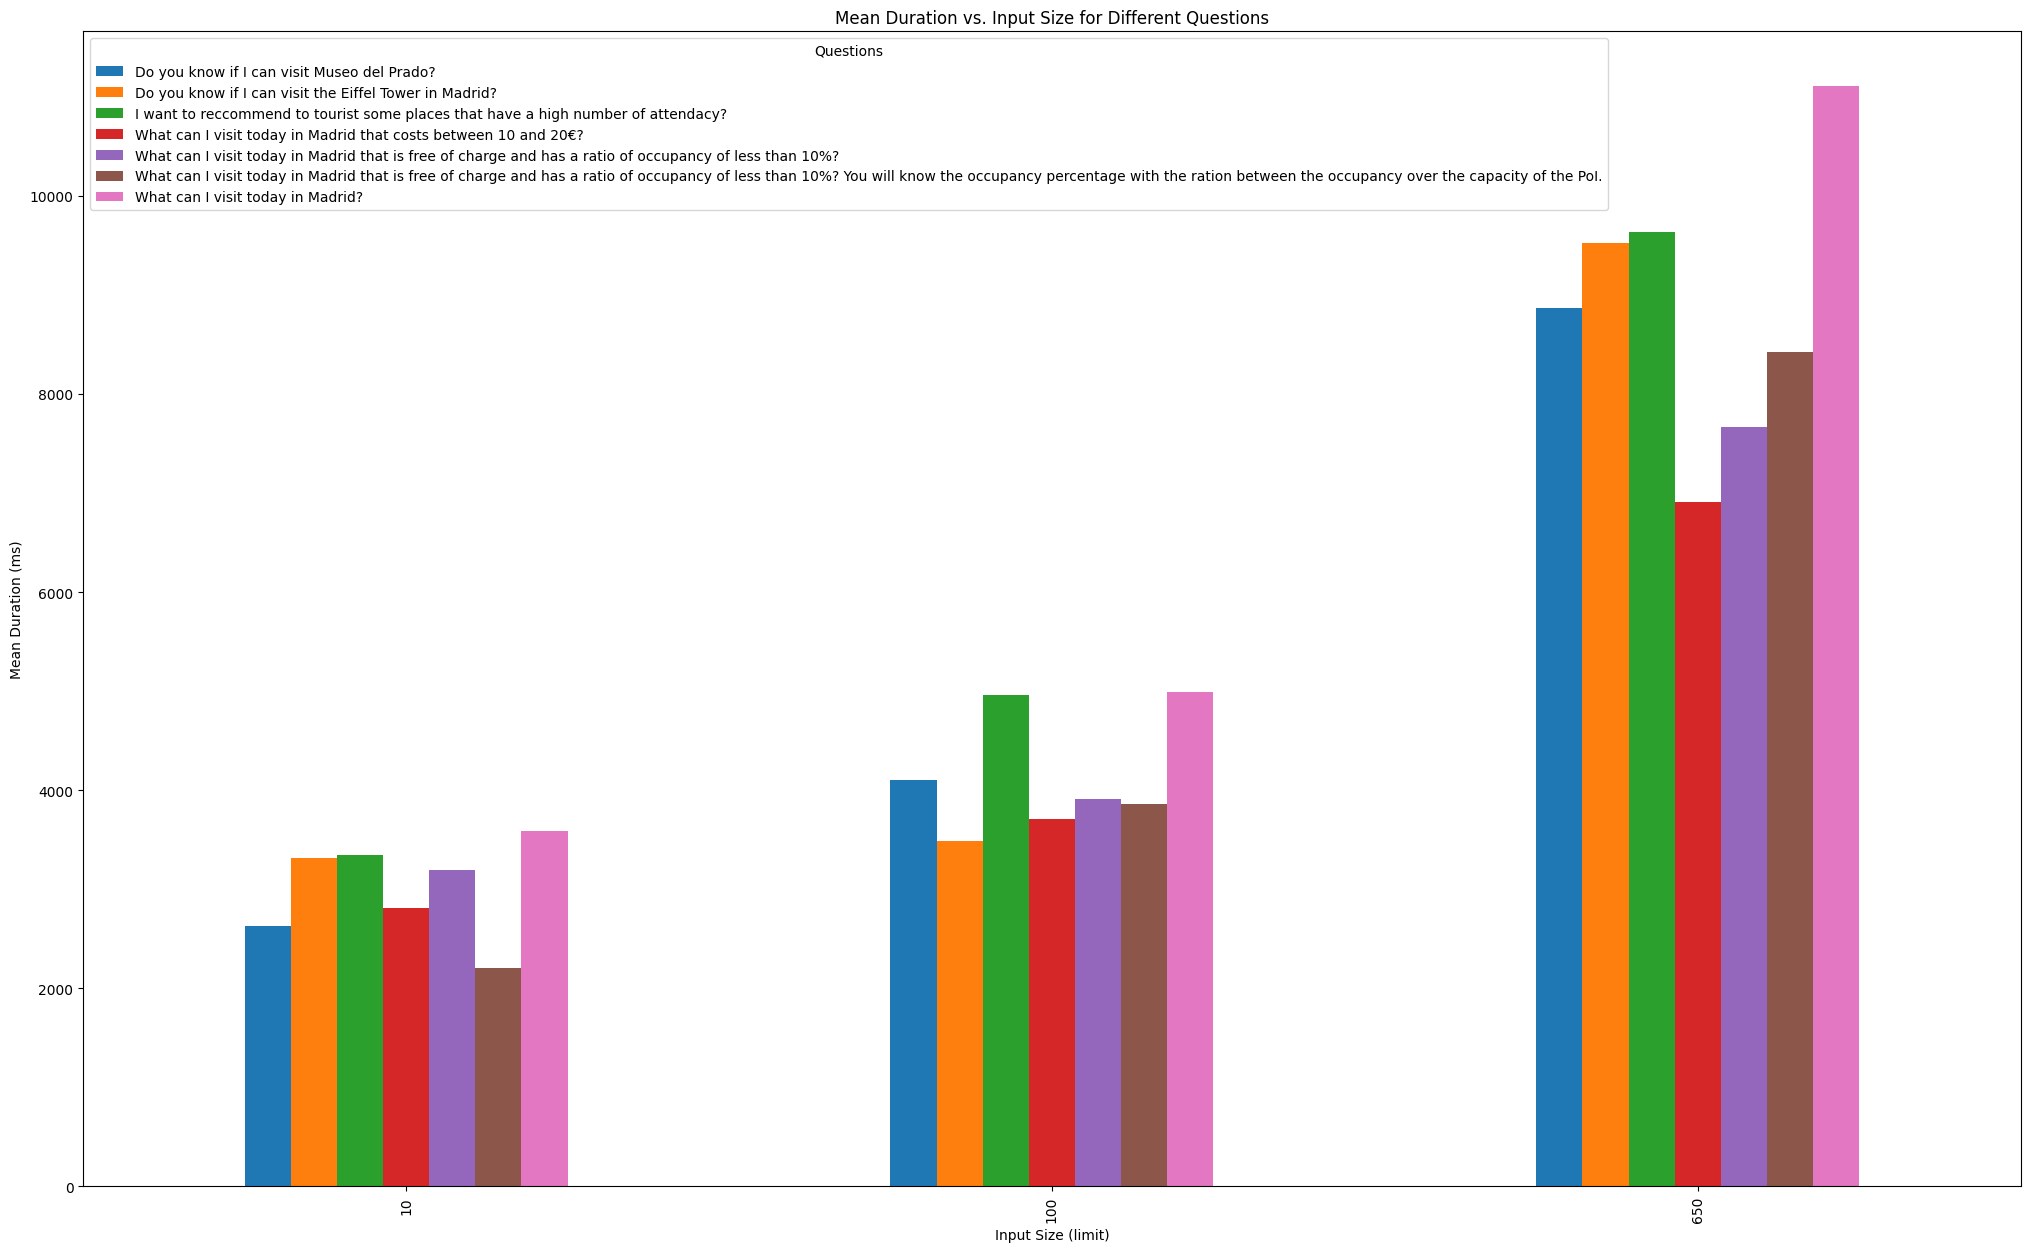

In [18]:
# Group the data by 'limit' and 'prompt'
grouped = df.groupby(['limit', 'prompt'])

# Calculate mean durations
mean_durations = grouped['duration_mean'].mean().reset_index()

# Pivot the table to have prompts as columns
pivot_table = mean_durations.pivot(index='limit', columns='prompt', values='duration_mean')

# Plot the data
pivot_table.plot(kind='bar', figsize=(25, 15))
plt.title('Mean Duration vs. Input Size for Different Questions')
plt.xlabel('Input Size (limit)')
plt.ylabel('Mean Duration (ms)')
plt.legend(title='Questions')
plt.show()


In [19]:
pivot_table_reordered.columns = ['Q1', 'Q2', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', ]
pivot_table_reordered

NameError: name 'pivot_table_reordered' is not defined

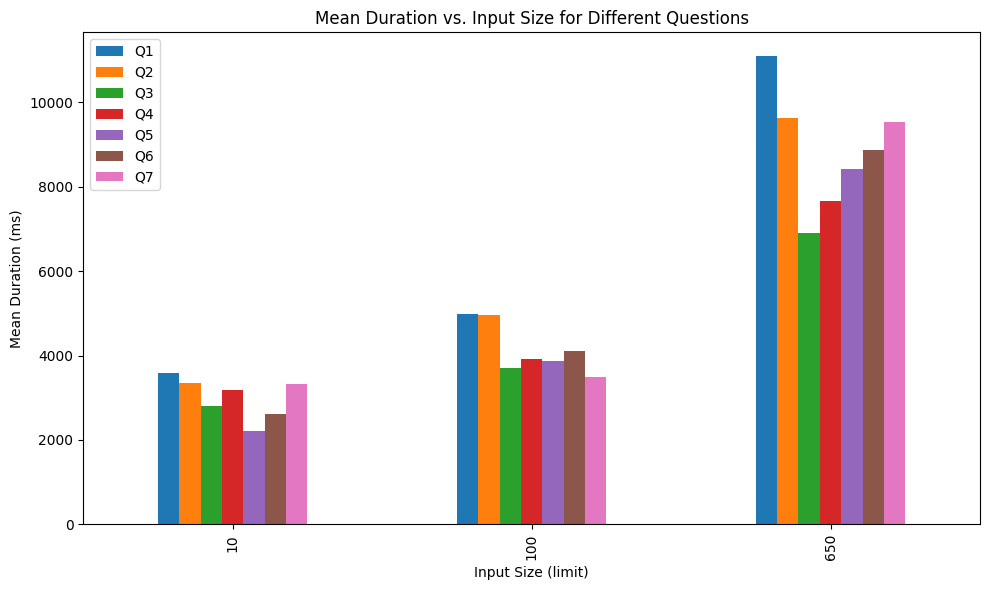

In [20]:
mean_durations
desired_order = [6, 2, 3, 4, 5, 0, 1,
                 13, 9, 10, 11, 12, 7, 8,
                 20, 16, 17, 18, 19, 14, 15,] #reorganize df to be aligned with prompt desired order of apparence
x_labels = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']  # Prompt numbers

mean_durations_sorted = mean_durations.iloc[desired_order].copy().set_index('prompt').reset_index()
mean_durations_sorted = grouped['duration_mean'].mean().reset_index()

# Pivot the table to have prompts as columns
#pivot_table = mean_durations_sorted.pivot(index='limit', columns='prompt', values='duration_mean')

pivot_table_reordered = pivot_table.iloc[:, [6, 2, 3, 4, 5, 0, 1,]]  #reorde groupped questions
pivot_table_reordered.columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', ]


# Plot the data
pivot_table_reordered.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Duration vs. Input Size for Different Questions')
plt.xlabel('Input Size (limit)')
plt.ylabel('Mean Duration (ms)')
#plt.legend(title='Questions')

plt.tight_layout()  # Ensure everything fits before saving
plt.savefig('LLM_CB_mean_durations_dissagregated.png', format='png', dpi=600, bbox_inches='tight')
plt.show()


In [44]:
# Define the desired prompt order
desired_order = [6, 2, 3, 4, 5, 0, 1]

# Reindex the DataFrame according to the custom order
prompt_durations = prompt_durations.iloc[desired_order].copy().set_index('prompt').reset_index().reset_index()
prompt_durations



NameError: name 'prompt_durations' is not defined

In [34]:
pivot_table_reordered

,Q1,Q2,Q1,Q1,Q1,Q1,Q1
limit,,,,,,,
10,3586.376667,3341.720,2812.985000,3195.780000,2206.045,2624.645,3317.905000
100,4989.920000,4961.205,3704.645000,3914.680000,3861.765,4104.650,3489.990000
650,11105.538333,9639.272,6907.633333,7667.951667,8420.830,8864.255,9528.163333


## Plot Duration Over Time

If you want to see how the durations change over time for different input sizes, you can do the following:

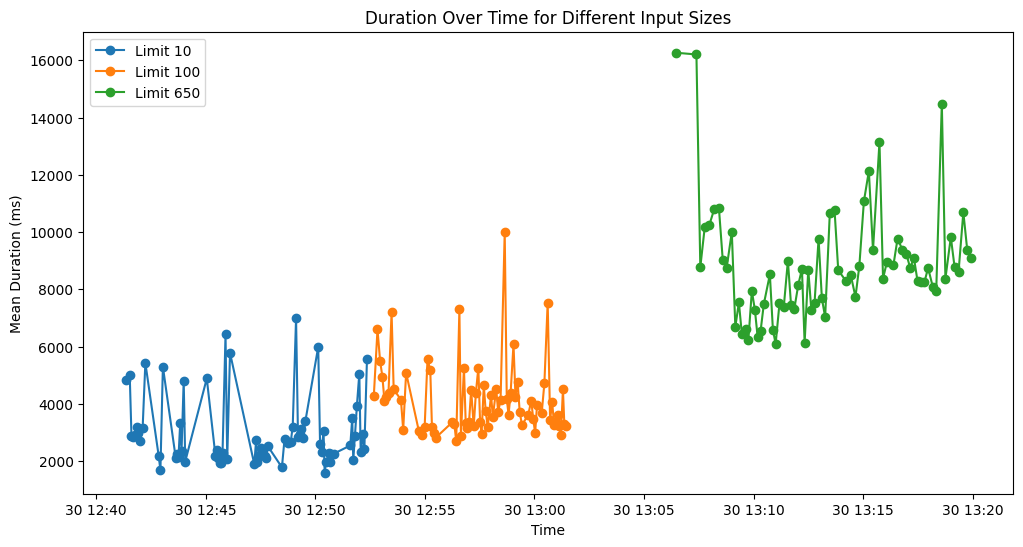

In [19]:
# Sort the DataFrame by 'logTime'
df_sorted = df.sort_values('logTime')

# Plot duration over time for each input size
plt.figure(figsize=(12, 6))

for limit_value in df_sorted['limit'].unique():
    subset = df_sorted[df_sorted['limit'] == limit_value]
    plt.plot(subset['logTime'], subset['duration_mean'], marker='o', label=f'Limit {limit_value}')

plt.title('Duration Over Time for Different Input Sizes')
plt.xlabel('Time')
plt.ylabel('Mean Duration (ms)')
plt.legend()
plt.show()


## Plot Duration for Different Questions

To analyze the duration for each question regardless of the input size:

In [21]:
df['durationCB'].std() / df['durationCB'].mean()

0.7062842585208806

In [27]:
# Group by 'prompt' and calculate mean duration
prompt_durations = df.groupby('prompt')['durationOAI_mean'].mean().reset_index()

# Define the desired prompt order
desired_order = [6, 2, 3, 4, 5, 0, 1]

# Reindex the DataFrame according to the custom order
prompt_durations = prompt_durations.iloc[desired_order].copy().set_index('prompt').reset_index().reset_index()
prompt_durations

,index,prompt,durationOAI_mean
0,0,What can I visit today in Madrid?,3919.888333
1,1,I want to reccommend to tourist some places th...,3014.732333
2,2,What can I visit today in Madrid that costs be...,1626.067778
3,3,What can I visit today in Madrid that is free ...,2142.183889
4,4,What can I visit today in Madrid that is free ...,2088.160000
5,5,Do you know if I can visit Museo del Prado?,2439.536667
6,6,Do you know if I can visit the Eiffel Tower in...,2309.949444


In [24]:
df['durationOAI_mean'].std() / df['durationOAI_mean'].mean() 

0.6076989768534016

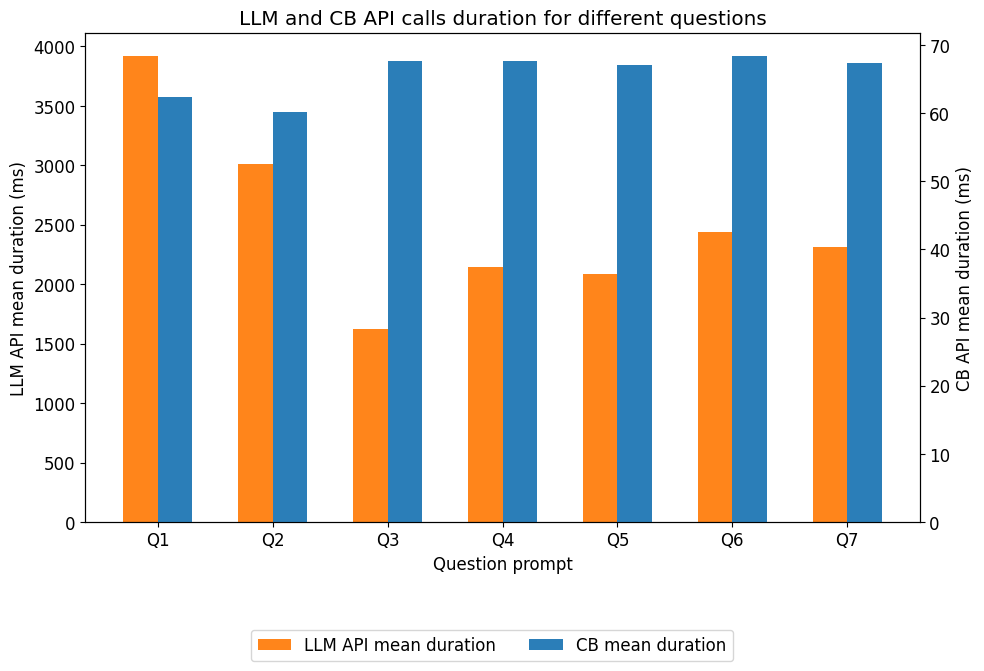

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the first bar graph (mean duration values)
x_labels = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']  # Prompt numbers

# Data for the second bar graph (secondary y-axis)
CB_mean_duration = df.groupby('prompt')['durationCB'].mean().reset_index()


# Set the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.rcParams.update({'font.size': 12})  # Set global font size to 12points

# Bar plot 1 (left y-axis)
bar_width = 0.3  # Width of the bars
x = np.arange(len(x_labels))

bars1 = ax1.bar(x - bar_width / 2, prompt_durations['durationOAI_mean'], bar_width, label='LLM API mean duration', color='tab:orange', alpha=0.95)

ax1.set_xlabel('Question prompt')
ax1.set_ylabel('LLM API mean duration (ms)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels)

# Secondary y-axis
ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis
bars2 = ax2.bar(x + bar_width / 2, CB_mean_duration['durationCB'], bar_width, label='CB mean duration', color='tab:blue', alpha=0.95)
ax2.set_ylabel('CB API mean duration (ms)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Adding legends
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=12)

# Show plot
plt.title('LLM and CB API calls duration for different questions')
plt.xlabel('Prompt')
fig.tight_layout()  # Ensure everything fits before saving
plt.show()
fig.savefig('LLM_CB_mean_durations.png', format='png', dpi=600, bbox_inches='tight')

TypeError: unhashable type: 'numpy.ndarray'

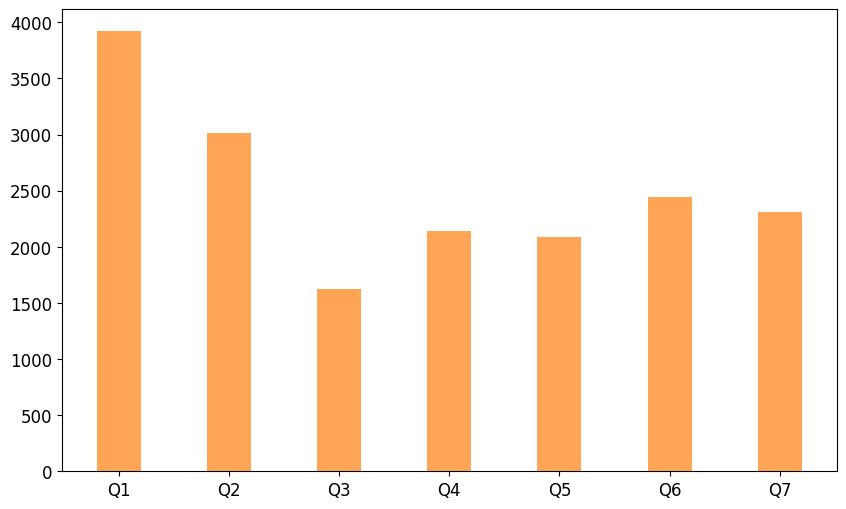

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the x_labels and data from your DataFrame
x_labels = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']  # Prompt numbers

LLM_mean_duration = prompt_durations['durationOAI_mean']  # Data for LLM API
CB_mean_duration = df.groupby('prompt')['durationCB'].mean().reset_index()


# Set the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
plt.rcParams.update({'font.size': 12})  # Set global font size to 12 points

# Bar plot (single axis)
bar_width = 0.4  # Width of the bars
x = x_labels


# Plot bars on the same positions with transparency
bars1 = ax.bar(x, LLM_mean_duration, bar_width, label='LLM API mean duration', color='tab:orange', alpha=0.7)
bars2 = ax.bar(x, CB_mean_duration, bar_width, label='CB mean duration', color='tab:blue', alpha=1)

# Set labels and ticks
ax.set_xlabel('Question prompt')
ax.set_ylabel('API mean duration (ms)', color='black')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

# Adding legend
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=12)

# Add grid and title
plt.title('LLM and CB API calls duration for different questions')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
fig.tight_layout()  # Ensure everything fits
plt.show()


In [36]:
durationCB_mean = df.groupby('prompt')['durationCB'].mean().reset_index()
durationCB_mean['durationCB'].tolist()

[62.34000000059605,
 60.17666666706403,
 67.58333333383004,
 67.63999999960264,
 67.05333333412806,
 68.38666666497787,
 67.3999999995033]

In [37]:
prompt_durations['durationOAI_mean'].tolist()

[3919.8883333336976,
 3014.7323333328463,
 1626.067777777132,
 2142.183888888028,
 2088.160000000149,
 2439.5366666682066,
 2309.949444445719]

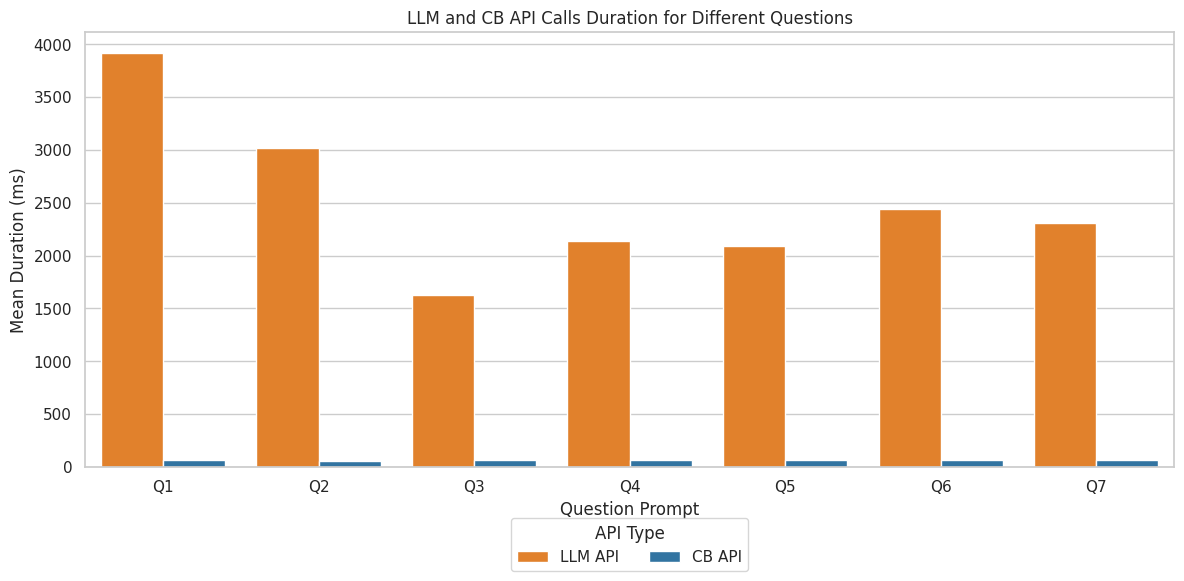

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example data (you can replace this with actual dataframes)
x_labels = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']
durationOAI_mean = prompt_durations['durationOAI_mean'].tolist()
durationCB_mean = durationCB_mean['durationCB'].tolist()

# Creating a combined DataFrame for Seaborn
data = pd.DataFrame({
    'Prompt': x_labels * 2,
    'Duration (ms)': durationOAI_mean + durationCB_mean,
    'Type': ['LLM API'] * len(x_labels) + ['CB API'] * len(x_labels)
})

# Plot using Seaborn
sns.set(style="whitegrid")  # Seaborn style
palette = {'LLM API': 'tab:orange', 'CB API': 'tab:blue'}

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=data, x='Prompt', y='Duration (ms)', hue='Type', palette=palette)

# Add labels and title
ax.set_xlabel('Question Prompt')
ax.set_ylabel('Mean Duration (ms)')
plt.title('LLM and CB API Calls Duration for Different Questions')

# Move legend below the chart
plt.legend(title='API Type', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.tight_layout()
plt.show()


# Additional Analysis

## Plot OpenAI Duration vs. Callback Duration

If you want to compare durationOAI_mean and durationCB:

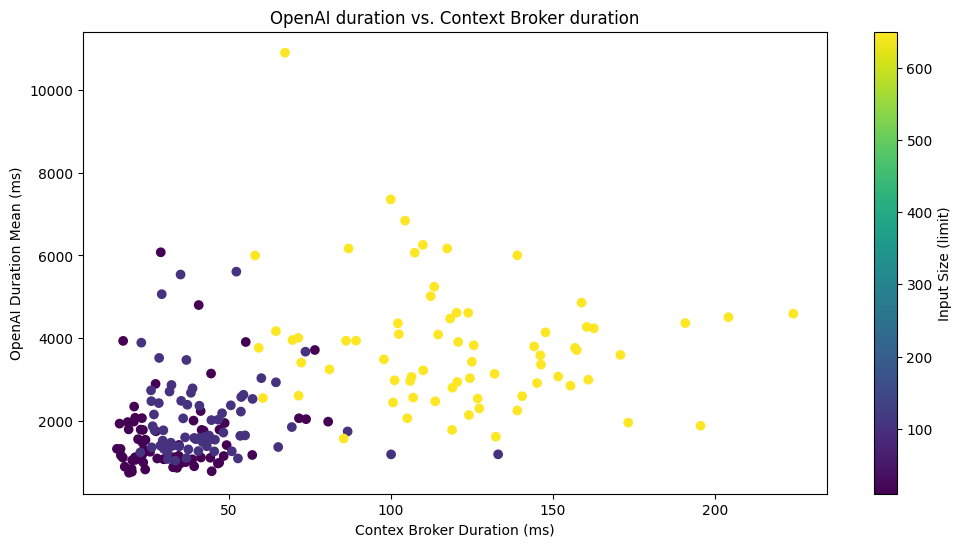

In [52]:
# Ensure 'durationCB' is numeric
df['durationCB'] = pd.to_numeric(df['durationCB'])

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(df['durationCB'], df['durationOAI_mean'], c=df['limit'], cmap='viridis')
plt.title('OpenAI duration vs. Context Broker duration')
plt.xlabel('Contex Broker Duration (ms)')
plt.ylabel('OpenAI Duration Mean (ms)')
plt.colorbar(label='Input Size (limit)')
plt.show()


# Dispersion Analysis

## Expand the Durations into Separate Rows

In [53]:
# Function to expand the list of durations into separate rows
def expand_durations(df, duration_col, label):
    # Create a DataFrame where each duration in the list becomes a row
    expanded_df = df.apply(lambda row: pd.Series(row[duration_col]), axis=1) \
                    .stack() \
                    .reset_index(level=1, drop=True) \
                    .to_frame(label)
    # Add other columns for grouping
    expanded_df['limit'] = df.loc[expanded_df.index, 'limit'].values
    expanded_df['prompt'] = df.loc[expanded_df.index, 'prompt'].values
    expanded_df['logTime'] = df.loc[expanded_df.index, 'logTime'].values
    return expanded_df

# Expand the durations
durationOAI_expanded = expand_durations(df, 'durationOAI_list', 'OpenAI Duration')
duration_expanded = expand_durations(df, 'duration_list', 'Total Duration')

# Expand 'durationCB' (since it's a single value per row)
durationCB_expanded = df[['durationCB', 'limit', 'prompt', 'logTime']]
durationCB_expanded = durationCB_expanded.rename(columns={'durationCB': 'Context Broker Duration'})


## Combine All Durations into One DataFrame

In [54]:
# Combine all durations
all_durations = pd.concat([
    durationCB_expanded.melt(id_vars=['limit', 'prompt', 'logTime'], var_name='Duration Type', value_name='Duration'),
    durationOAI_expanded.reset_index().melt(id_vars=['limit', 'prompt', 'logTime'], var_name='Duration Type', value_name='Duration'),
    duration_expanded.reset_index().melt(id_vars=['limit', 'prompt', 'logTime'], var_name='Duration Type', value_name='Duration')
], ignore_index=True)
all_durations = all_durations.drop(all_durations[all_durations['Duration Type'] == 'index'].index)

## Overall Distribution

First, let's create boxplots to visualize the overall distribution of each duration type.

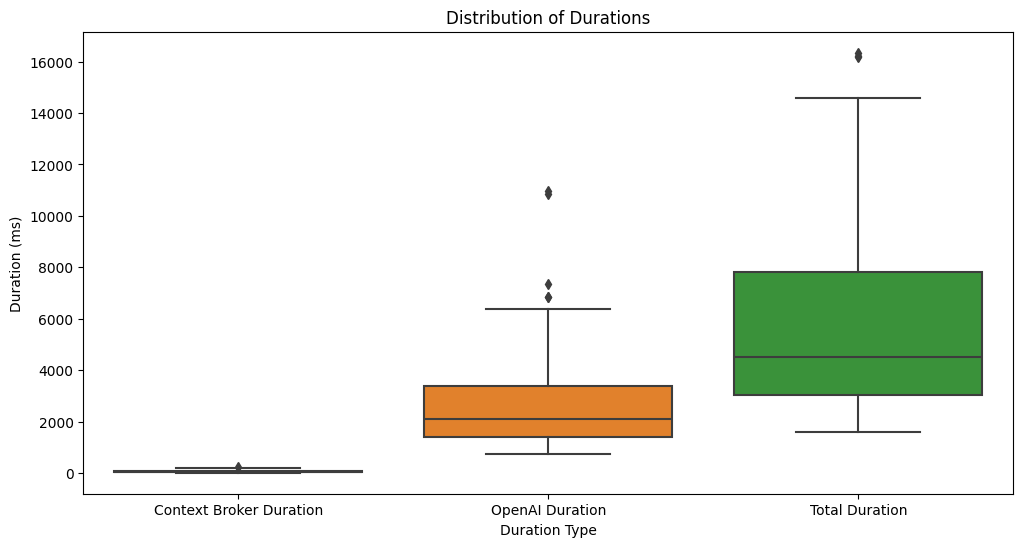

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Duration Type', y='Duration', data=all_durations)
plt.title('Distribution of Durations')
plt.ylabel('Duration (ms)')
plt.xlabel('Duration Type')
plt.show()


## Distribution by Input Size (limit)
Next, we'll create boxplots grouped by the limit to see how the input size affects the durations.

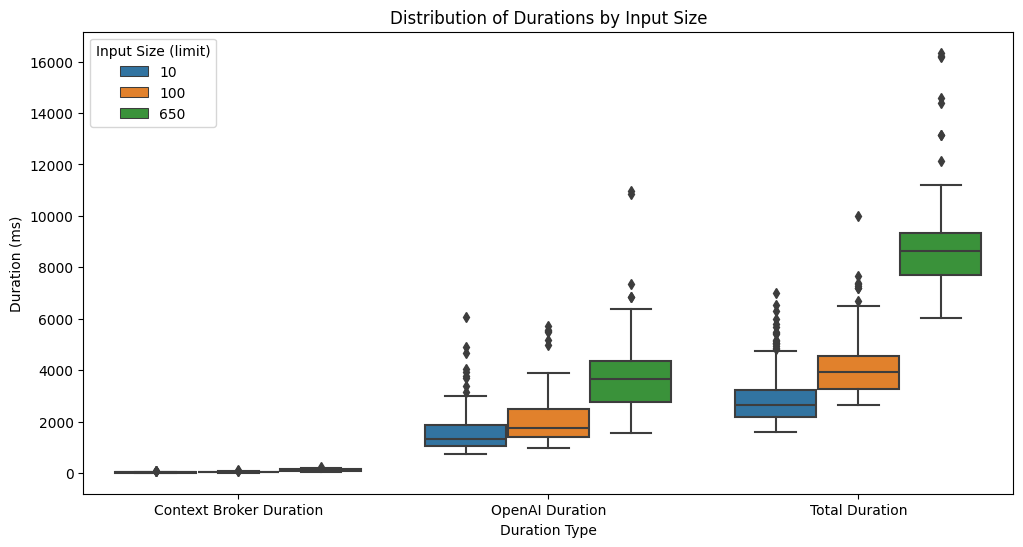

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Duration Type', y='Duration', hue='limit', data=all_durations)
plt.title('Distribution of Durations by Input Size')
plt.ylabel('Duration (ms)')
plt.xlabel('Duration Type')
plt.legend(title='Input Size (limit)')
plt.show()


## Distribution by Questions (prompt)
If you want to see how different questions affect the durations, you can group the data by prompt.

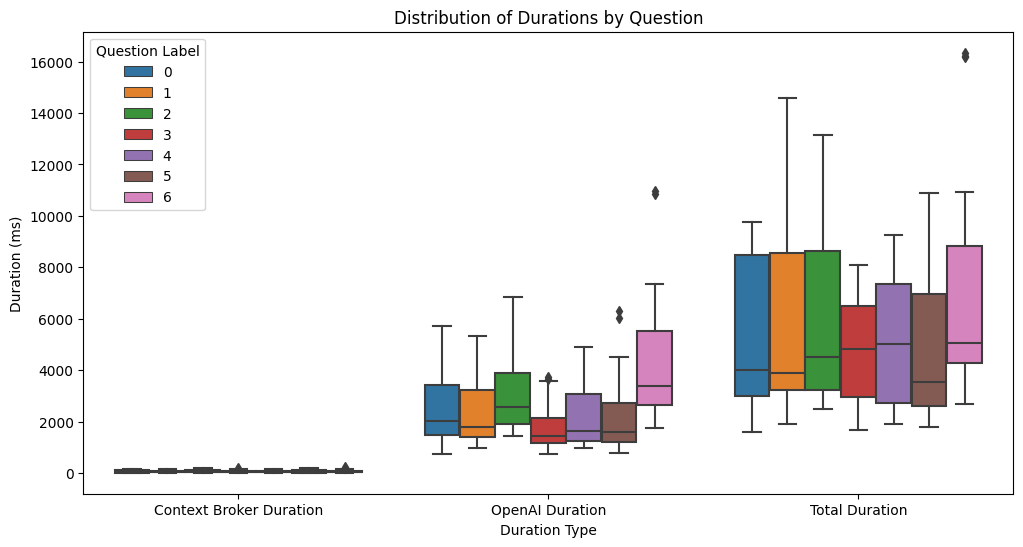

In [57]:
# Since prompts can be lengthy, assign shorter labels
all_durations['Prompt Label'] = all_durations['prompt'].astype('category').cat.codes

plt.figure(figsize=(12, 6))
sns.boxplot(x='Duration Type', y='Duration', hue='Prompt Label', data=all_durations)
plt.title('Distribution of Durations by Question')
plt.ylabel('Duration (ms)')
plt.xlabel('Duration Type')
plt.legend(title='Question Label')
plt.show()


# Create Violin Plots

## Overall Distribution

In [58]:
summary_stats = all_durations.groupby(['Duration Type'])['Duration'].describe()
print(summary_stats)

                         count         mean          std     min       25%  \
Duration Type                                                                
Context Broker Duration  210.0    65.797143    46.471486    15.6    30.025   
OpenAI Duration          348.0  2554.964368  1525.918442   726.3  1402.625   
Total Duration           348.0  5451.257759  2958.452557  1591.7  3034.400   

                            50%      75%      max  
Duration Type                                      
Context Broker Duration    45.2   101.95    224.1  
OpenAI Duration          2094.9  3401.10  10986.0  
Total Duration           4512.8  7833.55  16343.3  


In [59]:
all_durations['Duration Type'].unique()

array(['Context Broker Duration', 'OpenAI Duration', 'Total Duration'],
      dtype=object)

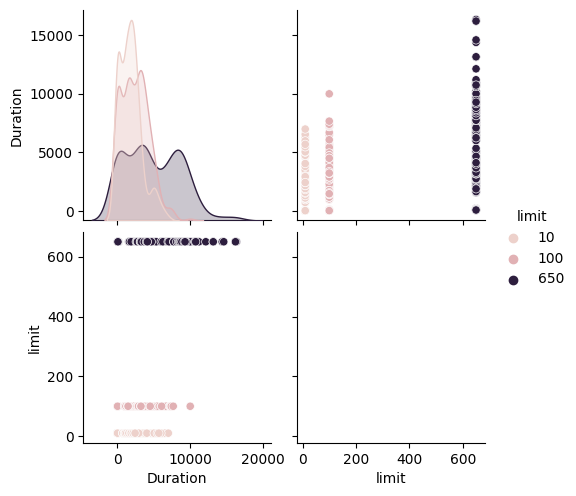

Duration Type
Context Broker Duration    0.849820
OpenAI Duration            0.612205
Total Duration             0.853850
dtype: float64


In [60]:
# Convert 'limit' to numeric if it's not already
all_durations['limit'] = pd.to_numeric(all_durations['limit'])

# Plot scatter plots
sns.pairplot(all_durations, vars=['Duration', 'limit'], hue='limit')
plt.show()

# Calculate correlation coefficients
correlations = all_durations.groupby('Duration Type').apply(lambda x: x['Duration'].corr(x['limit']))
print(correlations)


# Calculate Input Size in Bytes

## Identify PoIs Data

First, we need to determine where the PoIs data is stored in your DataFrame. Based on your CSV sample, it appears that the PoIs are in the zoomedEntities column, which contains a list of PoI IDs.

However, to accurately calculate the input size, we need the actual content of the PoIs that are included in the input sent to OpenAI. If the detailed PoIs data is stored in another column or needs to be fetched, please adjust the code accordingly.

For this example, I'll assume that the PoIs data is represented in the extraInstructions column (since it mentions "Here are the PoIs:") and that it includes the PoIs data.

## Concatenate the Input Components

We'll concatenate the relevant columns into a single string for each row and calculate its size in bytes.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Assuming 'df' is your DataFrame
# Ensure 'zoomedEntities' is parsed if it contains list data
def parse_list_column(column):
    return column.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

df['zoomedEntities_list'] = parse_list_column(df['zoomedEntities'])

# If PoIs data is available in another column, include it
# For now, we'll include 'zoomedEntities_list' as part of the input
df['PoIs_string'] = df['zoomedEntities_list'].apply(lambda x: ', '.join(x))

# Concatenate the input components
df['input_text'] = (
    df['assistantInstructions'] + ' ' +
    df['extraInstructions'] + ' ' +
    df['prompt'] + ' ' +
    df['PoIs_string']
)

# Calculate the size in bytes
df['input_size_bytes'] = df['input_text'].apply(lambda x: len(x.encode('utf-8')))


## Calculate Number of Tokens

Please, see: https://github.com/openai/tiktoken

Since OpenAI's API processes text based on tokens, calculating the number of tokens may provide better insight.

In [62]:
# Install tiktoken if not already installed
# !pip install tiktoken

import tiktoken

# Choose the appropriate encoding based on the model
encoding = tiktoken.encoding_for_model('gpt-4')

# Function to calculate the number of tokens
def count_tokens(text):
    return len(encoding.encode(text))

# Calculate number of tokens
df['input_tokens'] = df['input_text'].apply(count_tokens)


# Perform Correlation Analysis

## Compute Correlation Coefficients

### Correlation with Input Size in Bytes

In [ ]:
# Correlation between input size and OpenAI duration
corr_input_OAI = df['input_size_bytes'].corr(df['durationOAI_mean'])

# Correlation between input size and Context Broker duration
corr_input_CB = df['input_size_bytes'].corr(df['durationCB'])

# Correlation between input size and total duration
corr_input_total = df['input_size_bytes'].corr(df['duration_mean'])

print(f"Correlation between Input Size (Bytes) and OpenAI Duration: {corr_input_OAI:.4f}")
print(f"Correlation between Input Size (Bytes) and Context Broker Duration: {corr_input_CB:.4f}")
print(f"Correlation between Input Size (Bytes) and Total Duration: {corr_input_total:.4f}")


### Correlation with Number of Tokens

In [ ]:
# Correlation between number of tokens and OpenAI duration
corr_tokens_OAI = df['input_tokens'].corr(df['durationOAI_mean'])

# Correlation between number of tokens and Context Broker duration
corr_tokens_CB = df['input_tokens'].corr(df['durationCB'])

# Correlation between number of tokens and total duration
corr_tokens_total = df['input_tokens'].corr(df['duration_mean'])

print(f"Correlation between Input Tokens and OpenAI Duration: {corr_tokens_OAI:.4f}")
print(f"Correlation between Input Tokens and Context Broker Duration: {corr_tokens_CB:.4f}")
print(f"Correlation between Input Tokens and Total Duration: {corr_tokens_total:.4f}")


#  Visualize the Relationships

## Scatter Plots with Regression Lines
### OpenAI Duration vs. Input Size

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='input_size_bytes', y='durationOAI_mean', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('OpenAI Duration vs. Input Size (Bytes)')
plt.xlabel('Input Size (Bytes)')
plt.ylabel('OpenAI Duration Mean (ms)')
plt.show()


### Context Broker Duration vs. Input Size

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='input_size_bytes', y='durationCB', data=df, scatter_kws={'s': 50}, line_kws={'color': 'green'})
plt.title('Context Broker Duration vs. Input Size (Bytes)')
plt.xlabel('Input Size (Bytes)')
plt.ylabel('Context Broker Duration (ms)')
plt.show()


### Total Duration vs. Input Size

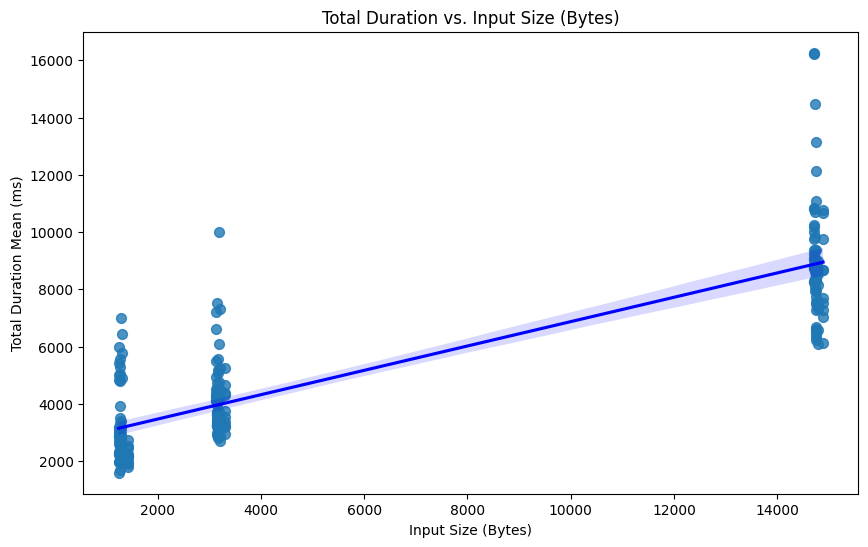

In [63]:
plt.figure(figsize=(10, 6))
sns.regplot(x='input_size_bytes', y='duration_mean', data=df, scatter_kws={'s': 50}, line_kws={'color': 'blue'})
plt.title('Total Duration vs. Input Size (Bytes)')
plt.xlabel('Input Size (Bytes)')
plt.ylabel('Total Duration Mean (ms)')
plt.show()


## Duration vs. Number of Tokens

### Duration vs. Number of Tokens

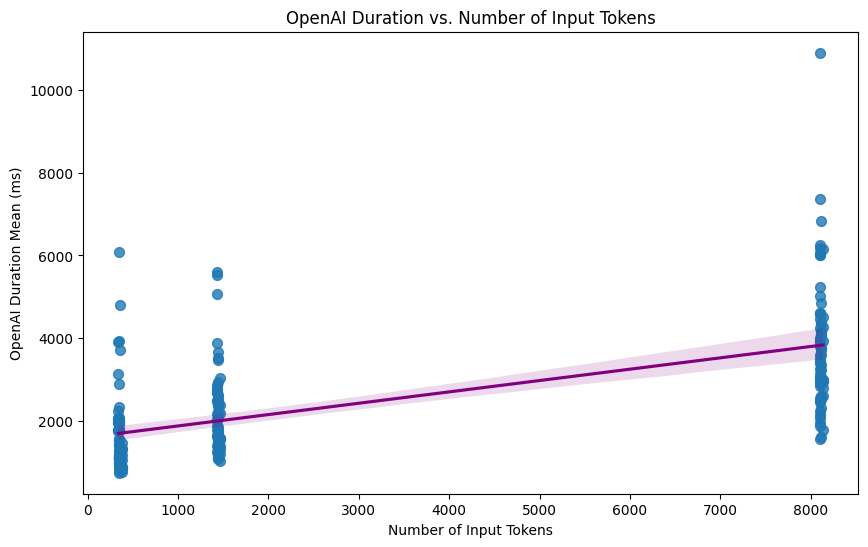

In [64]:
plt.figure(figsize=(10, 6))
sns.regplot(x='input_tokens', y='durationOAI_mean', data=df, scatter_kws={'s': 50}, line_kws={'color': 'purple'})
plt.title('OpenAI Duration vs. Number of Input Tokens')
plt.xlabel('Number of Input Tokens')
plt.ylabel('OpenAI Duration Mean (ms)')
plt.show()


# Additional Analysis

## Multiple Regression Analysis
To see how input size and other variables together affect the durations, perform a multiple regression.

In [65]:
import statsmodels.api as sm

# Prepare the predictor variables
X = df[['input_size_bytes', 'limit']]
X = sm.add_constant(X)  # Adds a constant term to the predictors

# OpenAI Duration Model
y_OAI = df['durationOAI_mean']
model_OAI = sm.OLS(y_OAI, X).fit()
print("OpenAI Duration Regression Results:")
print(model_OAI.summary())

# Context Broker Duration Model
y_CB = df['durationCB']
model_CB = sm.OLS(y_CB, X).fit()
print("\nContext Broker Duration Regression Results:")
print(model_CB.summary())

# Total Duration Model
y_total = df['duration_mean']
model_total = sm.OLS(y_total, X).fit()
print("\nTotal Duration Regression Results:")
print(model_total.summary())


OpenAI Duration Regression Results:
                            OLS Regression Results                            
Dep. Variable:       durationOAI_mean   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     74.56
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           4.09e-25
Time:                        19:19:31   Log-Likelihood:                -1779.4
No. Observations:                 210   AIC:                             3565.
Df Residuals:                     207   BIC:                             3575.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cons

Interpretation

    Coefficients: Indicate the change in duration per unit change in input size or limit.
    P-values: Show the statistical significance of each predictor (values below 0.05 are typically considered significant).
    R-squared: Represents the proportion of the variance in the dependent variable that's predictable from the independent variables.